In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


def data_clean():
    '''data_clean() 函数用于数据清洁，大致步骤如下：
    1. 统一设置国家代码为新索引
    2. 去掉多余的数据列
    3. 将不规范空值替换为 NaN，并进行填充
    '''
    # 读取数据
    df_data = pd.read_excel("ClimateChange.xlsx", sheetname='Data')

    # 选择数据
    df_co2 = df_data[df_data['Series code'] ==
                     'EN.ATM.CO2E.KT'].set_index('Country code')
    df_gdp = df_data[df_data['Series code'] ==
                     'NY.GDP.MKTP.CD'].set_index('Country code')

    # 缺失值替换
    df_co2_nan = df_co2.replace({'..': pd.np.NaN})
    df_gdp_nan = df_gdp.replace({'..': pd.np.NaN})

    # 缺失值填充
    df_co2_fill = df_co2_nan.iloc[:, 5:].fillna(
        method='ffill', axis=1).fillna(method='bfill', axis=1)
    df_gdp_fill = df_gdp_nan.iloc[:, 5:].fillna(
        method='ffill', axis=1).fillna(method='bfill', axis=1)

    # 数据合并
    df_co2_fill['CO2-SUM'] = df_co2_fill.sum(axis=1)
    df_gdp_fill['GDP-SUM'] = df_gdp_fill.sum(axis=1)
    df_merge = pd.concat([df_co2_fill['CO2-SUM'], df_gdp_fill['GDP-SUM']], axis=1)
    
    # 缺失数据填充为 0
    df_merge_fill = df_merge.fillna(value=0)

    return df_merge_fill


def co2_gdp_plot():
    '''co2_gdp_plot() 函数用于数据整理和绘图，大致步骤如下：
    1. 数据归一化
    2. 得到需要返回的数据
    3. 绘图
    '''
    # 读取数据
    df_clean = data_clean()

    # 数据归一化处理
    df_max_min = (df_clean - df_clean.min()) / (df_clean.max() - df_clean.min())

    # 获取中国归一化后的 CO2 和 GDP 数据
    china = []
    for i in df_max_min[df_max_min.index == 'CHN'].values:
        china.extend(np.round(i, 3).tolist())

    # 获取 5 个常任理事国标签及对应的坐标刻度
    countries_labels = ['USA', 'CHN', 'FRA', 'RUS', 'GBR']
    # 获取国家标签作为刻度标签
    sticks_labels = []
    # 获取相应国家序号对应着刻度坐标
    labels_position = []
    
    for i in range(len(df_max_min)):
        if df_max_min.index[i] in countries_labels:
            sticks_labels.append(df_max_min.index[i])
            labels_position.append(i)
    
    # 对数据进行绘图
    fig, axes = plt.subplots()
    df_max_min.plot(
        kind='line',
        title='GDP-CO2',
        ax=axes
    )
    plt.xlabel("Countries")
    plt.ylabel("Values")
    # 绘制 5 大常任理事国坐标刻度标签
    plt.xticks(labels_position, sticks_labels, rotation='vertical')
    plt.show()

    return axes, china


In [8]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 109kB/s a 0:00:01


In [9]:
data_clean()

/Users/Alfred/jupyter-py3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,CO2-SUM,GDP-SUM
Country code,,
ABW,4.512977e+04,3.552179e+10
ADO,1.082132e+04,4.295724e+10
AFG,2.320478e+04,1.156549e+11
AGO,2.921132e+05,5.983478e+11
ALB,7.683832e+04,1.231033e+11
ARE,2.133552e+06,2.285588e+12
ARG,3.260645e+06,5.426435e+12
ARM,8.584447e+04,8.857234e+10
ASM,0.000000e+00,0.000000e+00


/Users/Alfred/jupyter-py3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


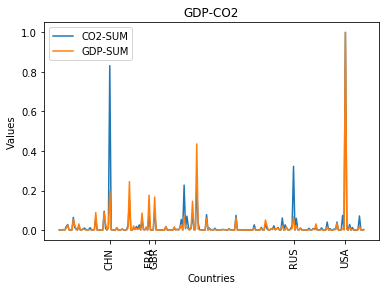

(<matplotlib.axes._subplots.AxesSubplot at 0x11f2e36d8>, [0.831, 0.197])

In [10]:
co2_gdp_plot()